<img src="https://raw.githubusercontent.com/CamiloHedzz/ProcesamientoImagenes/main/LogoUSA.png" align="top center">
<div align="center"><FONT FACE="times new roman" SIZE=5>
    <br><i><b>Docente:</b></i> Darwin Martinez<br>
    <br><i><b>Asignatura:</b></i> Procesamiento de imagenes<br>
    <br><i><b>Tema:</b></i> Filtros geométricos espaciales + umbralización<br>
    <br><i><b>Estudiante: </b></i>  Camilo Hernandez Ibañez<br>
</div>

In [17]:
# Se importan las siguientes bibliotecas
import PIL
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

**Abrir una imagen**

In [22]:
#Url de la imagen
urlImage = r'C:\Users\Camilo Hernandez\Documents\Universidad Sergio Arboleda\Octavo semestre\Procesamiento de imagenes\Taller 1\Images\pia16613_orig.png'

In [23]:
img = Image.open(urlImage)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

OSError: [Errno 22] Invalid argument: 'https://www.nasa.gov/sites/default/files/thumbnails/image/web_first_images_release_0.png'

In [16]:
import requests

url_imagen = "https://blog.golang.org/gopher/gopher.png" # El link de la imagen
nombre_local_imagen = "go.png" # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
	handler.write(imagen)

**Describir la imagen**

In [5]:
# Se obtienen las dimenciones
img = np.asarray(img)
wid, hgt = img.shape[1], img.shape[0]
  
# displaying the dimensions
print("La resolución de la imagen es: ",str(wid) + "x" + str(hgt))

La resolución de la imagen es:  1041x585


Con arr[:, :, :3] seleccionamos solo los valores RGB de cada pixel.

In [6]:
img

array([[[3, 3, 5],
        [3, 3, 5],
        [3, 3, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       [[4, 4, 6],
        [3, 3, 5],
        [3, 3, 5],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       [[4, 4, 6],
        [4, 4, 6],
        [4, 4, 6],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       ...,

       [[2, 2, 4],
        [2, 2, 4],
        [2, 2, 4],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]],

       [[2, 2, 4],
        [2, 2, 4],
        [2, 2, 4],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]],

       [[5, 5, 7],
        [4, 4, 6],
        [3, 3, 5],
        ...,
        [5, 5, 5],
        [2, 2, 2],
        [1, 1, 1]]], dtype=uint8)

**Transformar la escala**

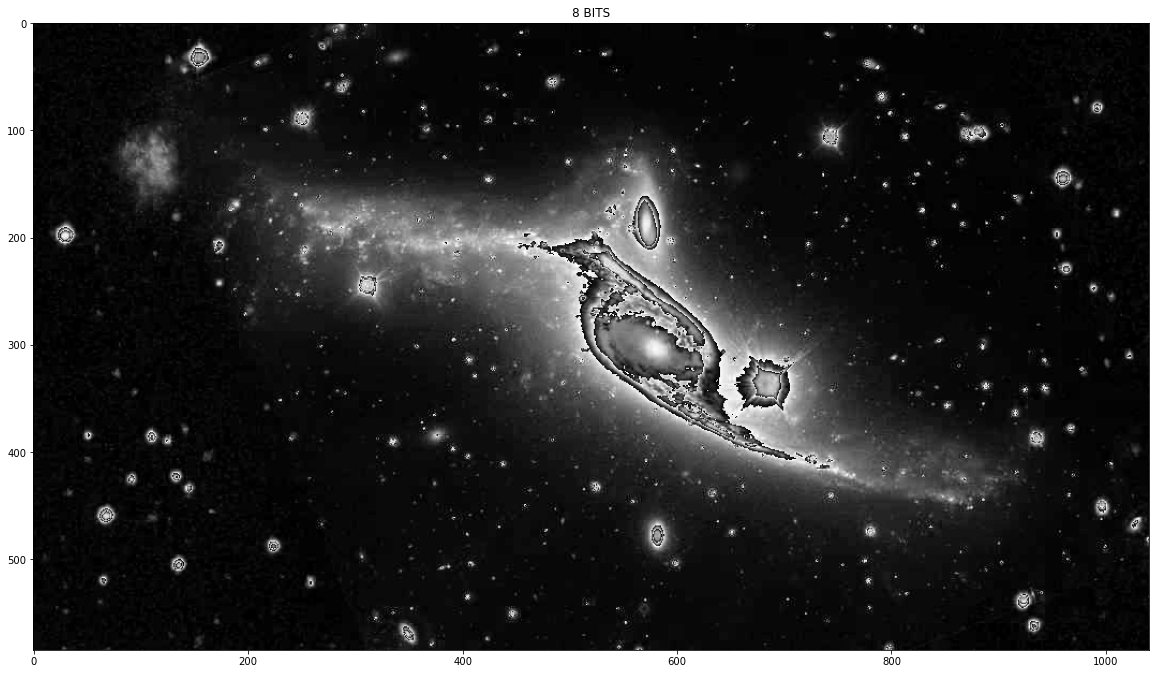

In [7]:
#Para este caso se hara uso de las bibliotecas de matplotlib para modificar
#a escala de grises
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray =  (R +  G + B)/3
plt.figure(figsize=(20,20))
plt.title("8 BITS")
plt.imshow(imgGray, cmap='gray')
plt.show()

**¿Cómo se sabe que la imagen esta a 8 bits?**

 Porque con 8 bits se pueden almacenar 256 tonos por canal RGB (de 0 a 255)

 De tal manera que 2 elevado a la 8 es igual a 256

In [8]:
print("Maximo tono de Rojo: ", R.max())
print("Maximo tono de Verde: ", G.max())
print("Maximo tono de Azul: ", B.max())

Maximo tono de Rojo:  255
Maximo tono de Verde:  255
Maximo tono de Azul:  255


**Convertir la imagen a 4bits**

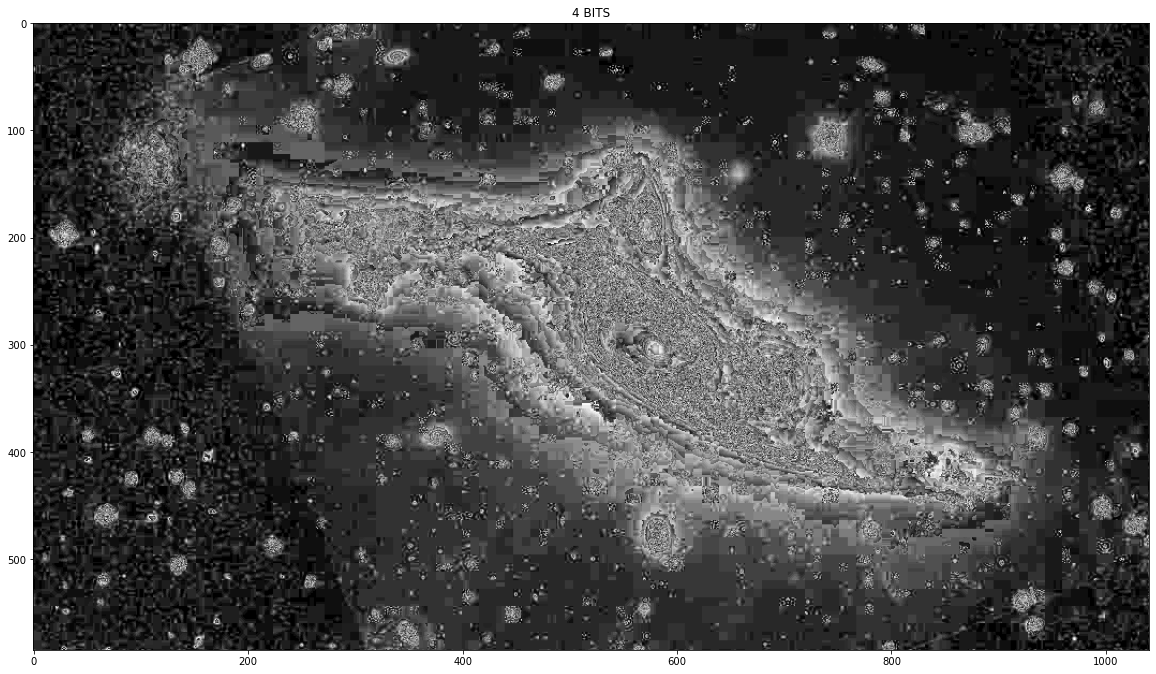

In [9]:
R4, G4, B4 = (15*img[:,:,0])/255, (15*img[:,:,1])/255, (15*img[:,:,2])/255
img4b = R4 + G4 + B4
plt.figure(figsize=(20,20))
plt.imshow(img4b, cmap='gray')
plt.title("4 BITS")
plt.show()

In [10]:
R4i = np.asarray(img[:,:,0])
G4i = np.asarray(img[:,:,1])
B4i = np.asarray(img[:,:,2])

In [11]:
for i in range(hgt):
  for j in range(wid):
    
    R4i[i][j] = (15*R[i][j])/255
    G4i[i][j] = (15*G[i][j])/255
    B4i[i][j] = (15*B[i][j])/255

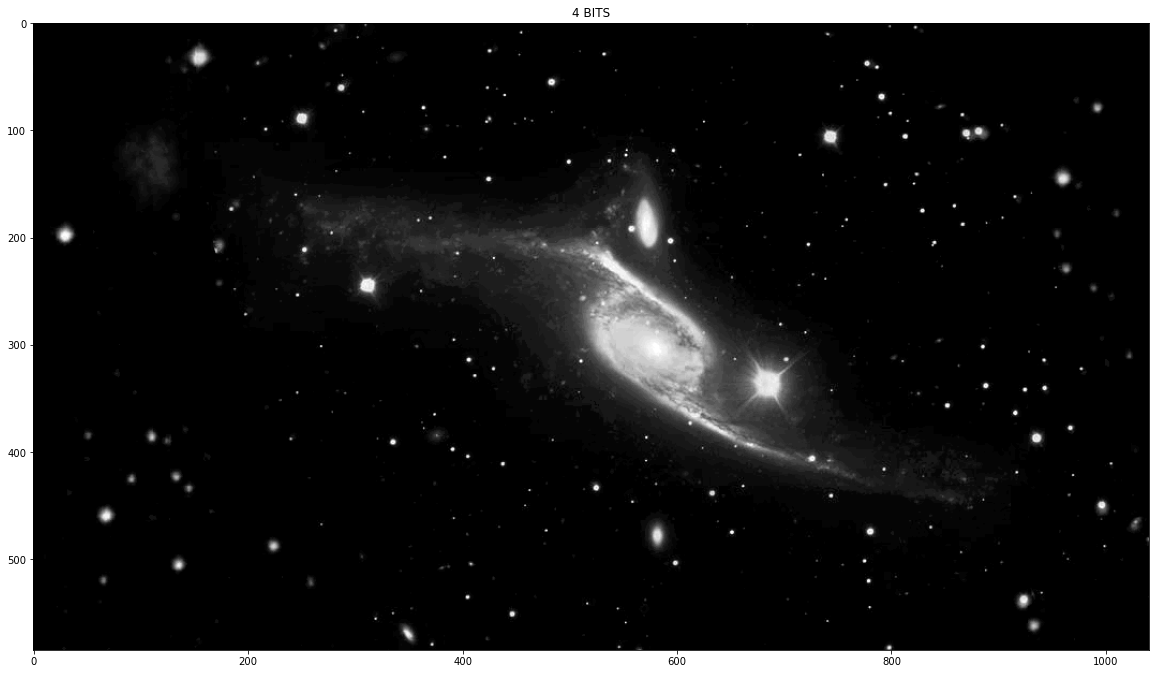

In [12]:
img4bits = R4i + G4i + B4i
plt.figure(figsize=(20,20))
plt.imshow(img4bits, cmap='gray')
plt.title("4 BITS")
plt.show()

In [13]:
R4i.max()

15

In [14]:
#img2 = [[[0 for j in range(3)] for i in range(wid)]]*hgt
img2 = np.asarray(R4i+G4i+B4i)


In [15]:
for i in range(wid):
    for j in range(hgt):
        img2[j][i][0] = R4i[j][i] 
        img2[j][i][1] = G4i[j][i]
        img2[j][i][2] = B4i[j][i]
    

TypeError: 'numpy.uint8' object does not support item assignment

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img2)
plt.title("4 BITS")
plt.show()

In [ ]:
img

In [ ]:
img2

In [ ]:
print("Maximo tono de Rojo: ", R4i.max())
print("Maximo tono de Verde: ", G4i.max())
print("Maximo tono de Azul: ", B4i.max())

**Comparación**

In [ ]:
plt.title("Original")
plt.imshow(img)
plt.figure()
plt.title("8 BITS")
plt.imshow(imgGray, cmap='gray')
plt.figure() 
plt.imshow(img4bits, cmap='gray')
plt.title("4 BITS")

plt.show()

In [ ]:
titles = ['Original Image','8 Bits','4 Bits']
images = [img, imgGray, img4bits]

for i in range(3):
  plt.figure(figsize=(30,30))
  plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

**Umbralización**

Inicialmente se tomará como umbral el promdedio de la escla de grises

In [ ]:
imgUmbral = imgGray
umbralizacion = 30

for i,f in enumerate(imgGray[range(hgt)]):
  for j,c in enumerate(f):
    if c<umbralizacion:
      aux=0
    else:
      aux=1
    imgUmbral[i][j] = aux 

In [ ]:
imgUmbral

In [ ]:
imgGray

In [ ]:
plt.title("8 BITS")
plt.imshow(imgUmbral, cmap='gray')
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
im = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Octavo Semestre/Procesemiento de Imagenes/images/universe.jpg',0)
 
# global thresholding
ret1,th1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(im,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [im, 0, th1, im, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
miArray = np.arange(3)
for i in miArray:
  plt.figure(figsize=(30,30)) 
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()